In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, ShuffleSplit, GroupKFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.datasets import load_breast_cancer, load_boston
cancer = load_breast_cancer()
boston = load_boston()

# Pipeline
機械学習はデータのスケール変換，特徴量の組合せ，特徴量の選別など色々しないといけない．  
Pipelineクラスは色々しなきゃいけないのを一気にやってくれる．

Pipelineのイニシャライザは，処理を行う順にEstimatorを書けばよい．  
例えば，Pipeline(特徴量抽出，特徴量選択，クラス分類)といった具合に．  
Estimatorは最後以外はtransformerメソッドを最後はfitメソッドがあればいい．  

イニシャライザでは，命名が必要だが，命名を自動でしてくれるmake_piplineも用意されている

### pipelineのfitとtest

In [11]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [13]:
print(pipe.score(X_test, y_test))

0.965034965034965


### pipelineでグリッドサーチ

In [32]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [34]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.97187414500684
0.965034965034965
{'svm__C': 10, 'svm__gamma': 1}


### make_pipeline

In [37]:
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))
print(pipe_short.steps)

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


### ステップ属性へのアクセス

In [45]:
pipe=make_pipeline(StandardScaler(), PCA(n_components=2))
pipe.fit(cancer.data)

components = pipe.named_steps["pca"].components_
print(components.shape)

(2, 30)


### グリッドリサーチ内の属性へのアクセス

In [47]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [49]:
param_grid = {'logisticregression__C' :[0.001, 0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\S2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\S2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100]})

In [53]:
# 最良のモデルの係数にアクセス

print(grid.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])


In [54]:
# 指定したステップのモデルの係数にアクセス

print(grid.best_estimator_.named_steps['logisticregression'])

LogisticRegression(C=1)


In [55]:
# 特徴量に対応する係数にアクセス

print(grid.best_estimator_.named_steps['logisticregression'].coef_)

[[-0.43570655 -0.34266946 -0.40809443 -0.5344574  -0.14971847  0.61034122
  -0.72634347 -0.78538827  0.03886087  0.27497198 -1.29780109  0.04926005
  -0.67336941 -0.93447426 -0.13939555  0.45032641 -0.13009864 -0.10144273
   0.43432027  0.71596578 -1.09068862 -1.09463976 -0.85183755 -1.06406198
  -0.74316099  0.07252425 -0.82323903 -0.65321239 -0.64379499 -0.42026013]]


### 特徴量の選択

In [88]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [89]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
             'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [90]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

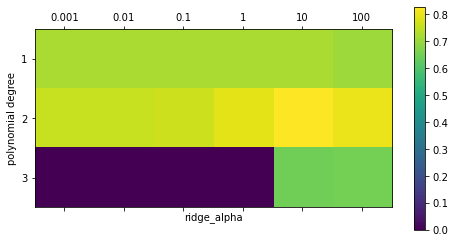

In [98]:
mean_test_scores = grid.cv_results_['mean_test_score'].reshape(len(param_grid['polynomialfeatures__degree']),
                                                              len(param_grid['ridge__alpha']))

plt.matshow(mean_test_scores, vmin=0, cmap="viridis")
plt.xlabel("ridge_alpha")
plt.ylabel("polynomial degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])
plt.colorbar()
plt.show()

In [100]:
# グラフからもわかるように，2次多項式とalpha10が最も良い

print(grid.best_params_)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


### 正規化の選択

In [101]:
pipe= Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [108]:
param_grid = [{'classifier': [SVC()],
               'preprocessing': [StandardScaler(), None],
               'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
               'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'classifier': [RandomForestClassifier(n_estimators=100)],
               'preprocessing': [None],
               'classifier__max_features': [1, 2, 3]}]
                     
X_train,X_test, y_train, y_test =train_test_split(
    cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit (X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=10, gamma=0.01)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler(), None]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [109]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_test, y_test))

{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
0.9858823529411765
0.9790209790209791
